# ATR in Actions

In [4]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr

In [6]:
# Get data
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(3650)
data = pdr.get_data_yahoo('MSFT', start_date, end_date)
df = data.copy()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-01,29.540001,28.620001,29.350000,29.16,74768100.0,22.996336
2010-04-05,29.430000,29.030001,29.129999,29.27,34331200.0,23.083084
2010-04-06,29.580000,28.980000,29.150000,29.32,47366800.0,23.122520
2010-04-07,29.559999,29.139999,29.160000,29.35,58318800.0,23.146170
2010-04-08,29.980000,29.299999,29.320000,29.92,63713800.0,23.595692


In [17]:
def get_atr(df, n=20):
    """Function to compute the Average True Range"""
    df['HL'] = np.abs(df['High'] - df['Low'])
    df['HPC'] = np.abs(df['High'] - df['Adj Close'].shift(1))
    df['LPC'] = np.abs(df['Low'] - df['Adj Close'].shift(1))
    df['TR'] = df[['HL', 'HPC', 'LPC']].max(axis=1, skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    output = df.drop(['HL', 'HPC', 'LPC'], axis=1)
    output.dropna(inplace=True)
    return output

In [18]:
atr_df = get_atr(df)

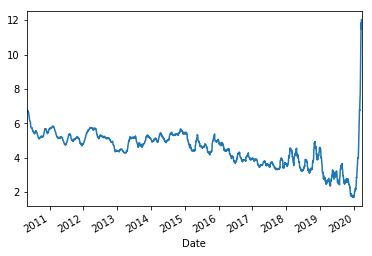

In [19]:
atr_df['ATR'].dropna().plot()

In [45]:
def get_bolling_bands(data, n):
    """This function compute the Bollinger Bands"""
    df = data.copy()
    df['MA'] = df['Adj Close'].rolling(n).mean()
    df["upper_band"] = df['MA'] + 1.96 * df['Adj Close'].rolling(n).std()
    df["lower_band"] = df['MA'] - 1.96 * df['Adj Close'].rolling(n).std()
    df['range'] = df['upper_band'] - df['lower_band']
    df.dropna(axis=0, inplace=True)
    return df

In [46]:
bb = get_bolling_bands(df, 20)

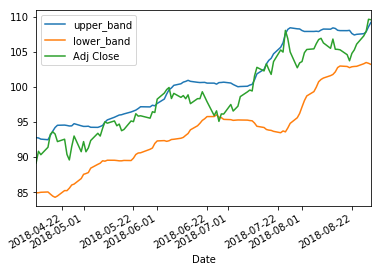

In [48]:
bb[['upper_band', 'lower_band', 'Adj Close']].iloc[2000:2100, :].plot()